<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [8]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [10]:
# Read CSV
house = pd.read_csv("Sacramento_transactions.csv")

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [16]:
# Target variable is the price. Because we want to know the values of this variable. In other words, we want to predict the
# values of price, given some known factors. 

target = house['price'].values
print(target[:5])

[59222 68212 68880 69307 81900]


#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [20]:
# All other features (excluded price features) can be Independent/Predictor variable

feature = house.drop('price', axis=1)
print(feature.columns)

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'latitude', 'longitude'],
      dtype='object')


#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [33]:
# The best predictor are baths, beds, sq_ft, longtitude and latitude features. Because these features have high value of
# correlation to price

corr = house.corr().abs().unstack().sort_values(ascending=False).reset_index()
corr.rename(columns={'level_0': 'feature_1', 'level_1': 'feature_2', 0: 'Correlation'}, inplace=True)
price_corr = corr[corr.feature_1 == 'price']
price_corr.head(10)

,feature_1,feature_2,Correlation
4,price,price,1.000000
16,price,baths,0.416208
22,price,beds,0.342024
23,price,sq__ft,0.333897
30,price,longitude,0.284485
40,price,zip,0.093353
46,price,latitude,0.039573


In [38]:
#Bonus: Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk')

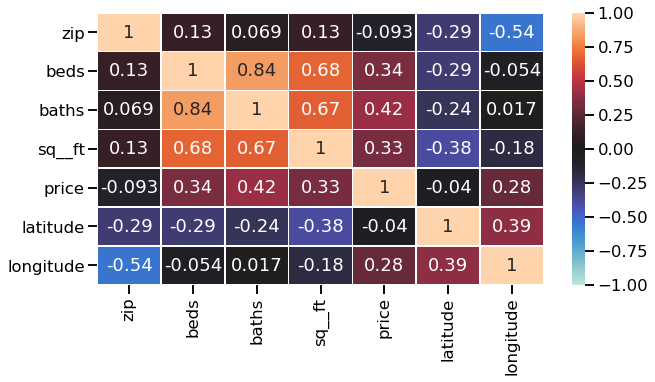

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(house.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='white')

#### 2.3 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [49]:
from sklearn.linear_model import LinearRegression

##### 2.3.1 Fit predictor(sq__ft) and target variables(price) using linear regression  

In [54]:
# ANSWER

X = house['sq__ft'].values.reshape(-1,1)
y = house['price'].values.reshape(-1,1)
print(X.shape, y.shape)

(985, 1) (985, 1)


In [55]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

##### 2.3.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [57]:
# ANSWER

r_square = reg.score(X, y)
print(f'R Square Score: {r_square}')

R Square Score: 0.11148717682951437


### 3. Splitting Data

In [58]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [59]:
# ANSWER
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [62]:
# ANSWER
## Check training/test data

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(689, 1) (296, 1)
(689, 1) (296, 1)


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [64]:
# ANSWER

reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.1686986202943216

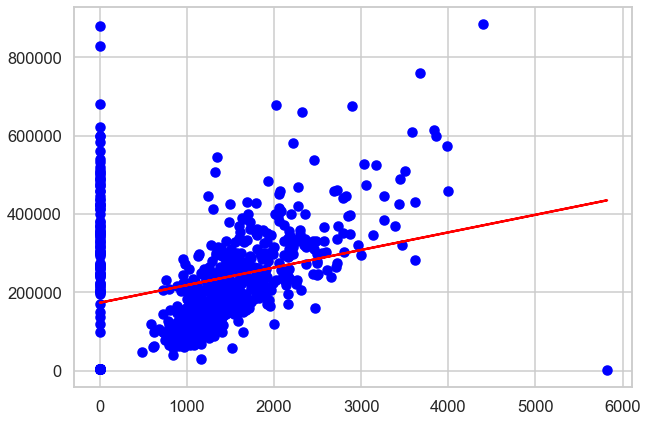

In [126]:
# Bonus: Plot the line
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, reg.predict(X_train), color='r')
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [111]:
# ANSWER
# Using the previous model of Univariate Linear Regression where the sole preditor is sq__ft
example = [[1204]]
df_example = pd.DataFrame(example, columns =['sq__ft'], dtype =float)
df_example.shape

(1, 1)

In [134]:
result = reg.predict(df_example)
print('Given a house with 1204 sqft in total space, then the model would predict: ${}'.format(reg.predict(df_example)))


Given a house with 1204 sqft, then the model would predict: $[[227769.72424283]]


This model is quite bad in prediction. However, accuracy is not the goal of this exercise. 



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



